In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
from numpy.fft import fft, fftfreq, ifft
import pandas as pd

from scipy.fftpack import *
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

from scipy import signal
from eofs.standard import Eof

plt.rcParams['font.family'] = 'deJavu Sans'
plt.rcParams['font.size'] = 20 #22

In [6]:
dataexcel=pd.read_excel('D:/EOF/EOF_FINAL/HANGNADIM.xlsx')
dates=[]
for i in range(len(dataexcel)):
    dates.append(np.datetime64(str(dataexcel.iloc[i].year)+"-"+str(dataexcel.iloc[i].month).zfill(2)+"-"+str(dataexcel.iloc[i].day).zfill(2)))

In [7]:
dataexcel

,Tanggal,year,month,day,rr
0,1991-01-02,1991,1,1,11.0
1,1991-01-03,1991,1,2,0.0
2,1991-01-04,1991,1,3,0.0
3,1991-01-05,1991,1,4,0.0
4,1991-01-06,1991,1,5,0.0
...,...,...,...,...,...
10953,2020-12-28,2020,12,27,1.0
10954,2020-12-29,2020,12,28,0.0
10955,2020-12-30,2020,12,29,0.4
10956,2020-12-31,2020,12,30,0.0


In [8]:
dates

[numpy.datetime64('1991-01-01'),
 numpy.datetime64('1991-01-02'),
 numpy.datetime64('1991-01-03'),
 numpy.datetime64('1991-01-04'),
 numpy.datetime64('1991-01-05'),
 numpy.datetime64('1991-01-06'),
 numpy.datetime64('1991-01-07'),
 numpy.datetime64('1991-01-08'),
 numpy.datetime64('1991-01-09'),
 numpy.datetime64('1991-01-10'),
 numpy.datetime64('1991-01-11'),
 numpy.datetime64('1991-01-12'),
 numpy.datetime64('1991-01-13'),
 numpy.datetime64('1991-01-14'),
 numpy.datetime64('1991-01-15'),
 numpy.datetime64('1991-01-16'),
 numpy.datetime64('1991-01-17'),
 numpy.datetime64('1991-01-18'),
 numpy.datetime64('1991-01-19'),
 numpy.datetime64('1991-01-20'),
 numpy.datetime64('1991-01-21'),
 numpy.datetime64('1991-01-22'),
 numpy.datetime64('1991-01-23'),
 numpy.datetime64('1991-01-24'),
 numpy.datetime64('1991-01-25'),
 numpy.datetime64('1991-01-26'),
 numpy.datetime64('1991-01-27'),
 numpy.datetime64('1991-01-28'),
 numpy.datetime64('1991-01-29'),
 numpy.datetime64('1991-01-30'),
 numpy.dat

In [10]:
#dates=dataexcel['Tanggal']
rr=dataexcel['rr']
rr_xarray = xr.DataArray(
    rr,
    dims="times",
    coords={"times": dates},
)

In [11]:
rr_xarray

<xarray.DataArray 'rr' (times: 10958)>
array([11. ,  0. ,  0. , ...,  0.4,  0. , 21. ])
Coordinates:
  * times    (times) datetime64[ns] 1991-01-01 1991-01-02 ... 2020-12-31

In [12]:
datamonth=rr_xarray.resample(times='1M').sum(dim='times')#rr_xarray.groupby("times.month")


In [13]:
xxx=datamonth.values.tolist()
xxx

[129.0,
 87.0,
 110.0,
 367.0,
 312.0,
 155.0,
 171.0,
 78.0,
 222.0,
 260.0,
 523.0,
 631.0,
 285.0,
 137.0,
 268.0,
 289.0,
 401.0,
 130.0,
 429.0,
 167.0,
 226.0,
 233.0,
 569.0,
 582.0,
 128.5,
 34.3,
 239.7,
 188.5,
 207.10000000000002,
 216.7,
 289.5,
 105.89999999999999,
 174.89999999999998,
 206.6,
 344.2,
 368.7,
 37.7,
 156.8,
 440.8,
 134.5,
 158.3,
 231.50000000000003,
 63.2,
 146.2,
 31.1,
 61.2,
 264.5,
 251.89999999999998,
 273.6,
 292.1,
 50.8,
 122.00000000000001,
 174.2,
 193.4,
 252.0,
 275.79999999999995,
 117.4,
 204.9,
 358.79999999999995,
 168.8,
 181.20000000000002,
 176.6,
 50.800000000000004,
 162.00000000000003,
 306.2,
 270.4,
 148.0,
 309.40000000000003,
 162.0,
 263.19999999999993,
 172.0,
 172.99999999999997,
 9.0,
 21.0,
 45.3,
 169.1,
 133.09999999999997,
 161.5,
 58.9,
 179.3,
 152.79999999999998,
 79.7,
 176.39999999999998,
 414.0,
 367.7,
 14.499999999999998,
 58.300000000000004,
 168.2,
 241.89999999999998,
 209.30000000000004,
 126.99999999999999,


In [14]:
yA=np.nanmean(datamonth.values.tolist())
stdsA=np.nanstd(datamonth.values.tolist())
df_norm=(datamonth.values.tolist()-yA)/stdsA

In [15]:
n = 360
# Distance of sampel in month
Lx = 360
x = np.linspace(0,Lx,n)
# Preparation step
## Creates all the necessery frequencies
freqs = fftfreq(n)
# Hanya mengambil sinyal yang positif
mask = freqs > 0
## FFT and Power spectra calculation
#fft_vals = fft(wilA_mean.rr.values)#df_wilA['norm'].to_list())
#fft_vals2 = fft(wilB_mean.rr.values)#df_wilB['norm'].to_list())
#fft_vals3 = fft(wilC_mean.rr.values)#df_wilC['norm'].to_list())

fft_vals = fft(datamonth.values.tolist())
# True Teoritical FFT
fft_teo = 2.0 * np.abs(fft_vals/n)

In [16]:
fft_vals

array([ 6.88709500e+04-0.00000000e+00j,  2.75151954e+03-9.90856871e+01j,
        3.04486441e+03-2.41992180e+03j,  1.91045017e+03-2.44714404e+02j,
        8.24701757e+02-3.41924041e+03j, -2.15275903e+03-9.39606187e+02j,
        1.02239595e+03-4.97734067e+03j,  1.73236497e+03-1.76664158e+03j,
        1.83218742e+03-2.18558632e+03j,  6.27215189e+02+1.03346802e+03j,
       -1.13887095e+03+2.14981382e+03j, -1.55685906e+03+2.34328589e+03j,
        2.06049494e+02+2.59787382e+02j, -9.95473363e+00-9.35997384e+02j,
       -3.70082054e+02+9.67612601e+02j, -1.40801941e+03+7.27430380e+02j,
        4.86350436e+00+2.86236397e+03j,  3.07384037e+01+9.14927346e+02j,
       -8.45400352e+02+1.54860577e+03j, -1.47317055e+03+5.21598465e+02j,
       -3.86036955e+02+2.77072644e+03j, -3.77687397e+02-2.77023940e+02j,
       -1.08057245e+03-1.55696147e+02j, -2.54023188e+02-1.34340282e+03j,
       -1.65747910e+03+1.20897751e+03j, -2.53467794e+03-8.90092599e+01j,
       -9.77501692e+02+8.29082025e+02j,  1.61969766

In [17]:
fft_teo

array([382.61638889,  15.29612813,  21.60762668,  10.70033028,
        19.54050712,  13.04932618,  28.22922792,  13.7460554 ,
        15.84424409,   6.71614747,  13.51579609,  15.62958465,
         1.84211598,   5.20027955,   5.75539165,   8.80458919,
        15.90204503,   5.08579751,   9.80186678,   8.68213797,
        15.54161035,   2.60217166,   6.0651761 ,   7.59560247,
        11.3975084 ,  14.09022392,   7.12084092,   8.9347053 ,
        12.05869783,   5.16670778,  32.57604351,   3.50734031,
         4.09143059,   9.77162316,   6.12013552,   6.22444439,
        13.19126637,   5.87422588,  16.9027369 ,   8.01657009,
        21.53092819,   9.0664706 ,   7.44923228,   7.95781699,
         6.05568463,  10.28276704,  10.07225079,  10.60578699,
         8.45846026,   3.94743936,   8.59125381,   6.04211637,
        11.66610561,  21.07080768,   6.35863839,   9.0599634 ,
        14.74357216,  15.49100415,   9.17115184,  23.5072815 ,
        53.73900473,  13.13767369,  11.41556851,   7.45

(3.0, 16.0)

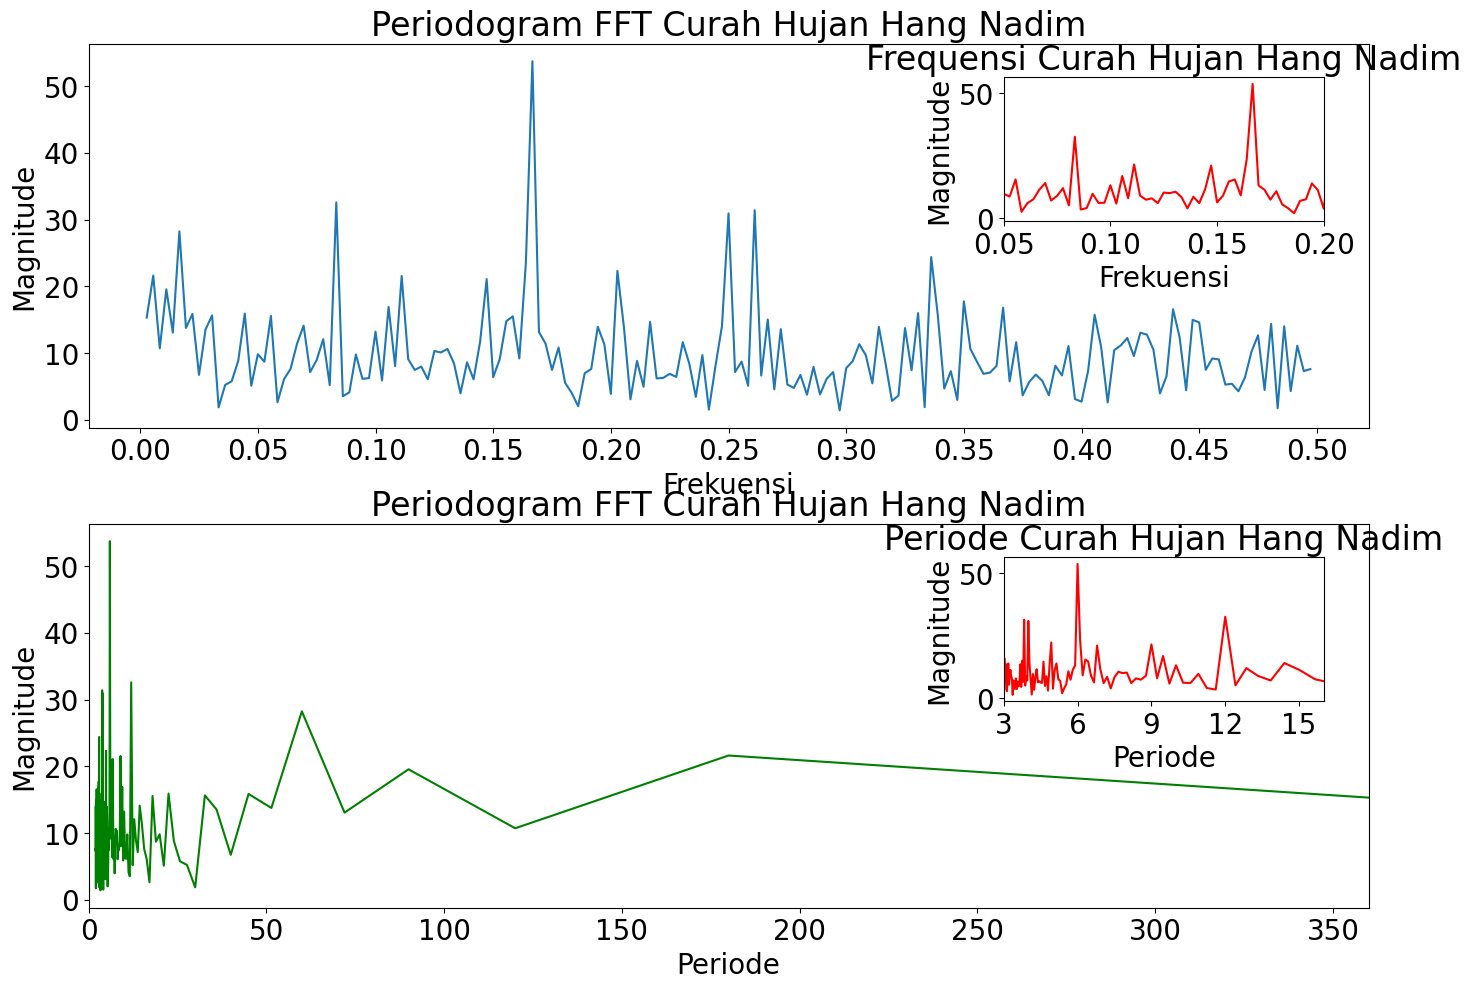

In [18]:
#Plot Periodogram FFT Curah Hujan Sumatera Selatan
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 0.8])
axfch = fig.add_axes([0, 1, 2, 0.8])
axfchk = fig.add_axes([1.43,1.43,0.5,0.3])
axfch2k = fig.add_axes([1.43,0.43,0.5,0.3])
# Frequensi
axfch.plot(freqs[mask], fft_teo[mask])
axfch.set_xlabel('Frekuensi')
axfch.set_ylabel('Magnitude')
axfch.set_title('Periodogram FFT Curah Hujan Hang Nadim')
axfch.axis('tight')
axfch.set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
axfchk.plot(freqs[mask], fft_teo[mask], 'r')
axfchk.set_xlabel('Frekuensi')
axfchk.set_ylabel('Magnitude')
axfchk.set_title('Frequensi Curah Hujan Hang Nadim')
axfchk.axis('tight')
axfchk.set_xticks([0.05, 0.1, 0.15, 0.2])
axfchk.set_xlim([0.05, 0.2])
# Periode
ax.plot(1/freqs[mask], fft_teo[mask], 'g')
ax.set_xlabel('Periode')
ax.set_ylabel('Magnitude')
ax.set_title('Periodogram FFT Curah Hujan Hang Nadim')
ax.axis('tight')
ax.set_xlim([0, 360])
axfch2k.plot(1/freqs[mask], fft_teo[mask], 'r')
axfch2k.set_xlabel('Periode')
axfch2k.set_ylabel('Magnitude')
axfch2k.set_title('Periode Curah Hujan Hang Nadim')
axfch2k.set_xticks([0, 3, 6, 9, 12, 15])
axfch2k.axis('tight')
axfch2k.set_xlim([3,16])

In [ ]:
n = 14488
# Distance of sampel in month
Lx = 
x = np.linspace(0,Lx,n)
# Preparation step
## Creates all the necessery frequencies
freqs = fftfreq(n)
# Hanya mengambil sinyal yang positif
mask = freqs > 0
## FFT and Power spectra calculation
#fft_vals = fft(wilA_mean.rr.values)#df_wilA['norm'].to_list())
#fft_vals2 = fft(wilB_mean.rr.values)#df_wilB['norm'].to_list())
#fft_vals3 = fft(wilC_mean.rr.values)#df_wilC['norm'].to_list())

fft_vals = fft(df_wilA['data'].to_list())
fft_vals2 = fft(df_wilB['data'].to_list())
fft_vals3 = fft(df_wilC['data'].to_list())
# True Teoritical FFT
fft_teo = 2.0 * np.abs(fft_vals/n)
fft_teo2 = 2.0 * np.abs(fft_vals2/n)
fft_teo3 = 2.0 * np.abs(fft_vals3/n)

In [4]:
fftxx=np.abs(rfft(rr))
len(fftxx)

7245

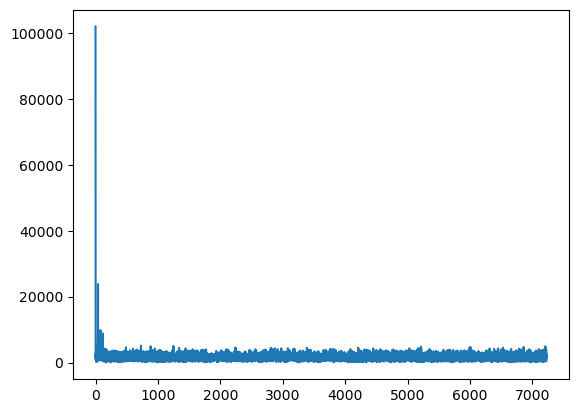

In [5]:
plt.plot(x,fftxx)

In [6]:
fftxy=np.abs(fft(rr))
len(fftxy)

14488

In [7]:
xx=np.linspace(0,len(fftxy),len(fftxy))

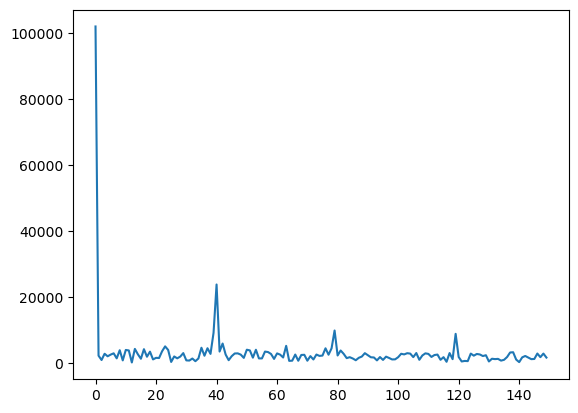

In [11]:
plt.plot(xx[0:150],fftxy[0:150])